In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')

Import the csv file

In [2]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


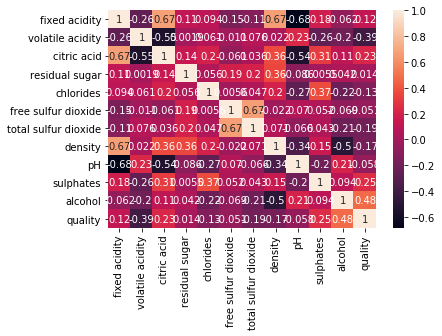

In [9]:
sns.heatmap(df.corr(),annot=True)

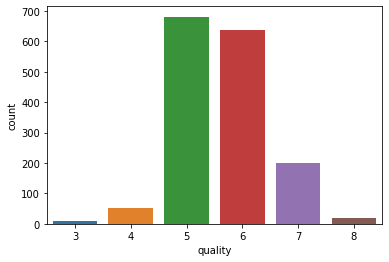

In [10]:
sns.countplot( df['quality'] )

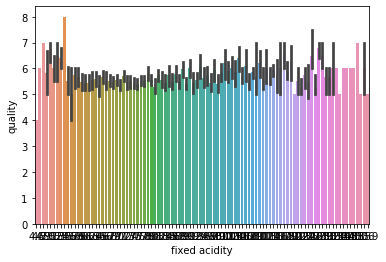

In [11]:
sns.barplot(x='fixed acidity', y='quality', data= df)

In [12]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [13]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [14]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0BE6EC6C8>,
      dtype=object)

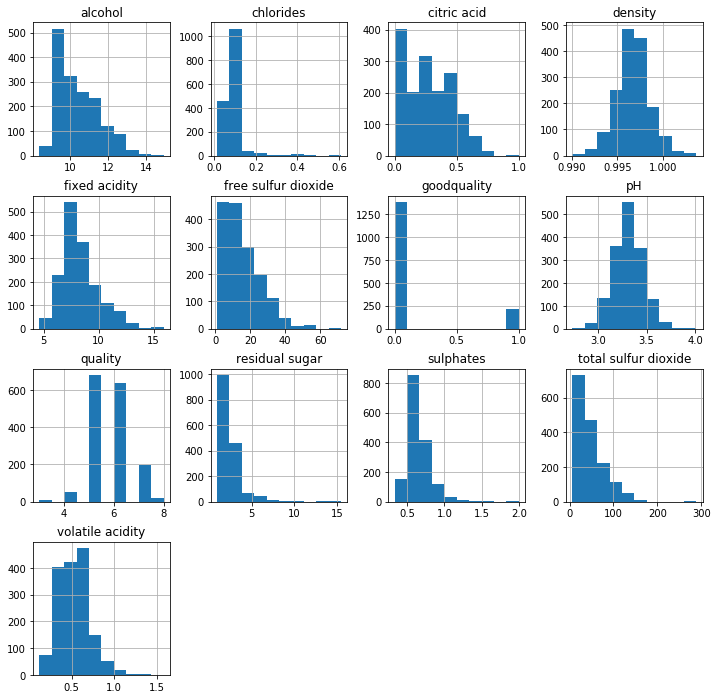

In [15]:
df.hist(figsize=(12,12))

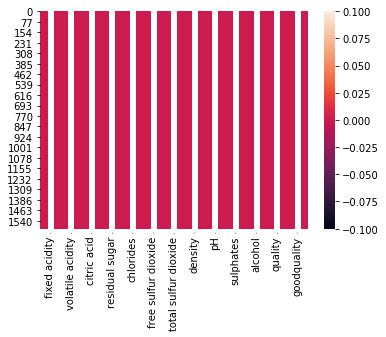

In [16]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

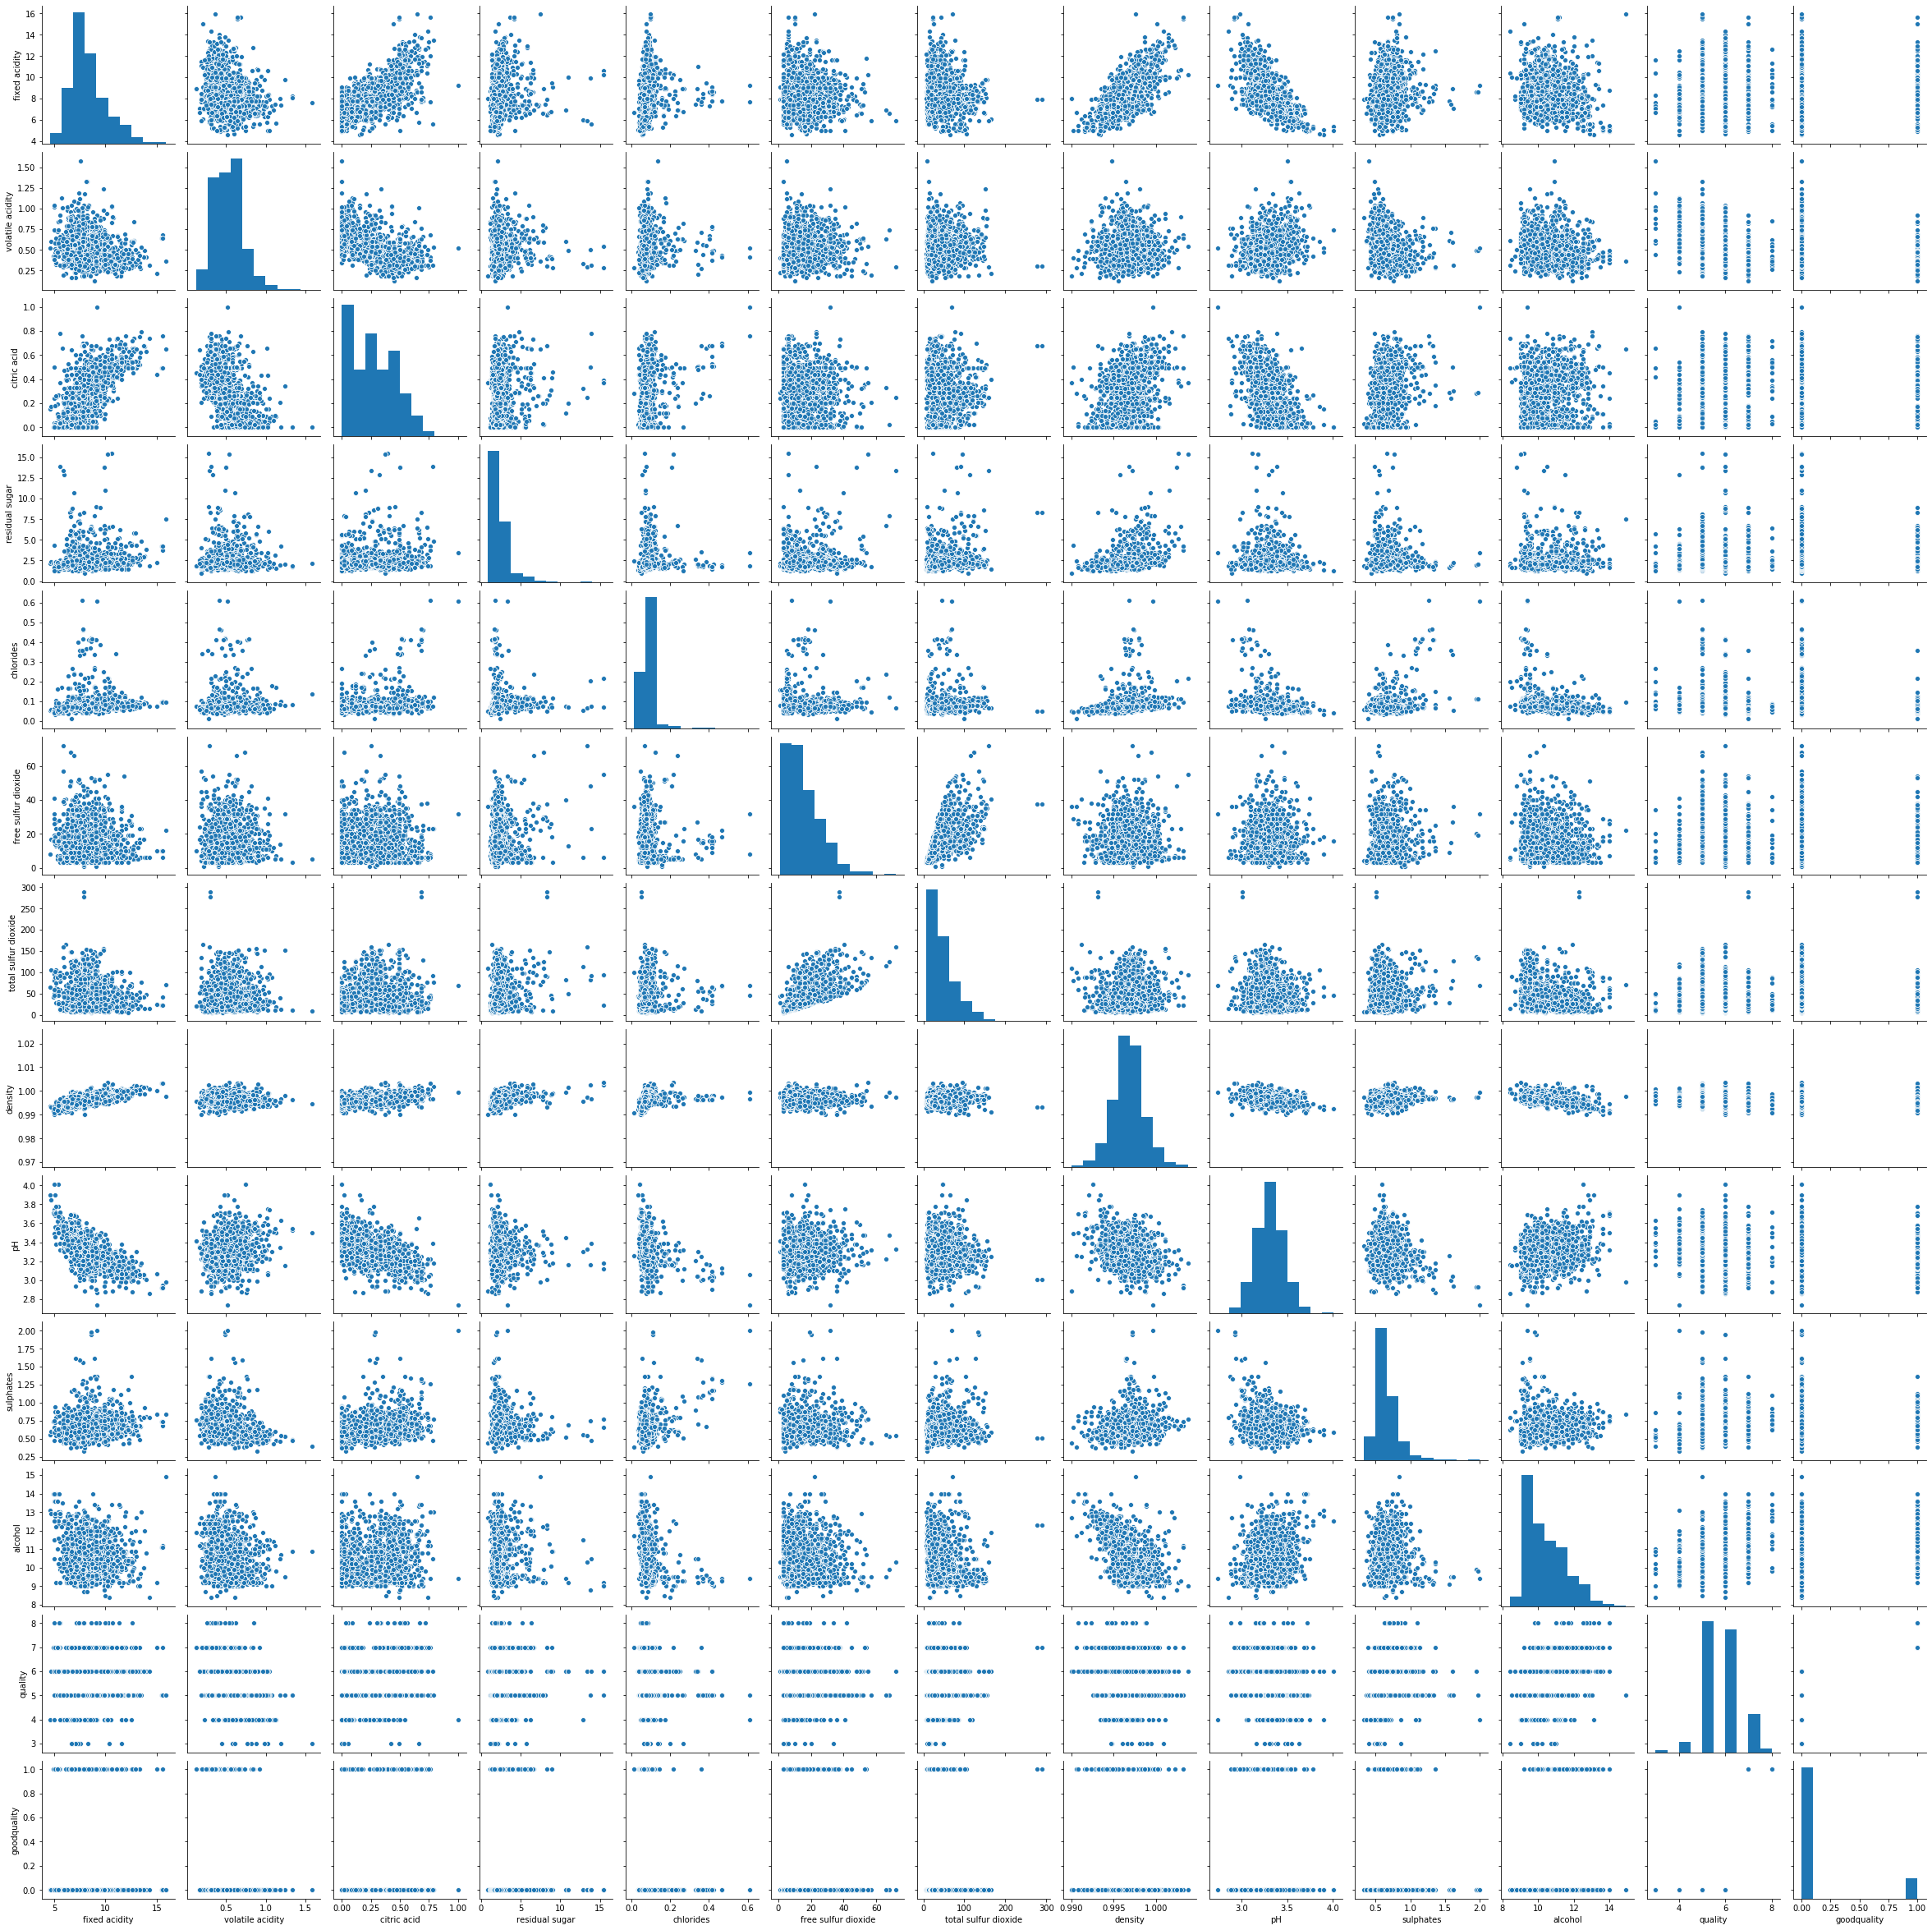

In [17]:
sns.pairplot(df)

Check Whether their are outliers present in the given dataset

In [18]:
from scipy.stats import zscore
z_score=abs(zscore(df))
z_score

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.96024611, 0.78782264,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.58477711, 0.78782264,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.58477711, 0.78782264,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54162988, 0.45084835,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.20930812, 0.78782264,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.54162988, 0.45084835,
        0.39625599]])

In [19]:
print(df.shape)


(1599, 13)


In [20]:
df_new=df[(z_score<3).all(axis=1)]
print(df_new.shape)

(1451, 13)


In [21]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
goodquality             2.129363
dtype: float64

In [22]:
y = df.quality
x = df.drop('quality', axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler
x_features = x
x = StandardScaler().fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is",max_r_score)

r2_score corresponding to random state:  42 is:  0.6306978094897262
r2_score corresponding to random state:  43 is:  0.573000258649043
r2_score corresponding to random state:  44 is:  0.5734734554519985
r2_score corresponding to random state:  45 is:  0.5841298924659787
r2_score corresponding to random state:  46 is:  0.5825807378566514
r2_score corresponding to random state:  47 is:  0.5636671244559703
r2_score corresponding to random state:  48 is:  0.5627764315599487
r2_score corresponding to random state:  49 is:  0.6035191584500557
r2_score corresponding to random state:  50 is:  0.5299911899340358
r2_score corresponding to random state:  51 is:  0.5401367022580976
r2_score corresponding to random state:  52 is:  0.6125281166444372
r2_score corresponding to random state:  53 is:  0.5893942461938902
r2_score corresponding to random state:  54 is:  0.5830608405236661
r2_score corresponding to random state:  55 is:  0.6000639937680103
r2_score corresponding to random state:  56 is:  

r2_score corresponding to random state:  173 is:  0.567156379265539
r2_score corresponding to random state:  174 is:  0.5915553996256915
r2_score corresponding to random state:  175 is:  0.5985970831105647
r2_score corresponding to random state:  176 is:  0.595477983483705
r2_score corresponding to random state:  177 is:  0.5728482993566022
r2_score corresponding to random state:  178 is:  0.5511727152508636
r2_score corresponding to random state:  179 is:  0.6031478999947053
r2_score corresponding to random state:  180 is:  0.5793761417316092
r2_score corresponding to random state:  181 is:  0.6264259781006691
r2_score corresponding to random state:  182 is:  0.567690066907967
r2_score corresponding to random state:  183 is:  0.635334352585299
r2_score corresponding to random state:  184 is:  0.6247260639556407
r2_score corresponding to random state:  185 is:  0.599124150870663
r2_score corresponding to random state:  186 is:  0.5864913241470049
r2_score corresponding to random state:

In [25]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.15      0.16        13
           5       0.71      0.69      0.70       133
           6       0.72      0.74      0.73       133
           7       0.97      0.84      0.90        38
           8       0.14      0.50      0.22         2

    accuracy                           0.71       320
   macro avg       0.45      0.49      0.45       320
weighted avg       0.72      0.71      0.71       320



In [26]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.66      0.77      0.71       133
           6       0.73      0.68      0.70       133
           7       0.97      1.00      0.99        38
           8       1.00      0.50      0.67         2

    accuracy                           0.73       320
   macro avg       0.56      0.49      0.51       320
weighted avg       0.70      0.72      0.71       320



In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring="r2").mean()

0.5537422649980348

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =100 ,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [29]:
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.552424232835364
RMSE is :  0.5299564075429309


In [30]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_df.csv')

['lr_df.csv']